# **Conformal Geoemtric Algebra - Plotting Elements**

In this notebook we focus on plotting some of the elements we've created in the previous notebooks.

In [1]:
using Pkg
Pkg.activate(".")
using CliffordAlgebras
import CliffordAlgebras: basegrade
using LinearAlgebra: norm, normalize, dot
using LaTeXStrings

using Plots
include("./auxiliary.jl")
plotly();

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/GeometricAlgebra`
┌ Warning: For saving to png with the `Plotly` backend `PlotlyBase` and `PlotlyKaleido` need to be installed.
│   err = ArgumentError("Package PlotlyBase not found in current path.\n- Run `import Pkg; Pkg.add(\"PlotlyBase\")` to install the PlotlyBase package.")
└ @ Plots /home/davibarreira/.julia/packages/Plots/M4dfL/src/backends.jl:545


In [3]:
cl = CliffordAlgebra(:CGA3D)
no  = (cl.e₊ + cl.e₋)/2
n∞  = cl.e₋ - cl.e₊
I = no ∧ cl.e1 ∧ cl.e2 ∧ cl.e3 ∧ n∞; # This is the "correct" pseudoscalar for the conformal model
cdual(X::MultiVector) = X ⨼ inv(I)

# Formula from Dorst
F(x) = no + x + (x ⋅ x) * n∞ /2
point(x=0,y=0,z=0)  = no + x*cl.e1 + y*cl.e2 + z*cl.e3 + (x^2 + y^2 + z^2) * n∞/2

point (generic function with 4 methods)

## 1. Plotting Sphere

First, let's write some auxiliary functions to create a unit normal sphere and to plot it.

In [32]:
function sphere(ρ::Real=1.0, c::MultiVector=point(0,0,0))
    cdual(c - ρ^2 * n∞ /2)
end
function sphere(ρ::Real, c::Vector)
    cdual(point(c...) - ρ^2 * n∞ /2)
end
# function sphere(a::MultiVector,b::MultiVector,c::MultiVector,d::MultiVector)
# end

function generatespherepoints(Σ)
    ρ = √scalar((Σ * grin(Σ))/((n∞ ⨼ Σ)^2));
    c = -(1/2)*(Σ * n∞ * Σ)/((n∞ ⨼ Σ)^2)
    
    n = 100
    u = range(-π, π; length = n)
    v = range(0, π; length = n)
    x = ρ.*cos.(u) * sin.(v)' .+ c.e1
    y = ρ.*sin.(u) * sin.(v)' .+ c.e2
    z = ρ.*ones(n) * cos.(v)' .+ c.e3
    return x,y,z
end

function plotsphere(Σ::MultiVector;kwargs...)
    generatespherepoints(Σ)
    surface(x, y, z;kwargs...)
end
function plotsphere!(Σ::MultiVector;kwargs...)
    generatespherepoints(Σ)
    surface!(x, y, z; kwargs...)
end

plotsphere! (generic function with 1 method)

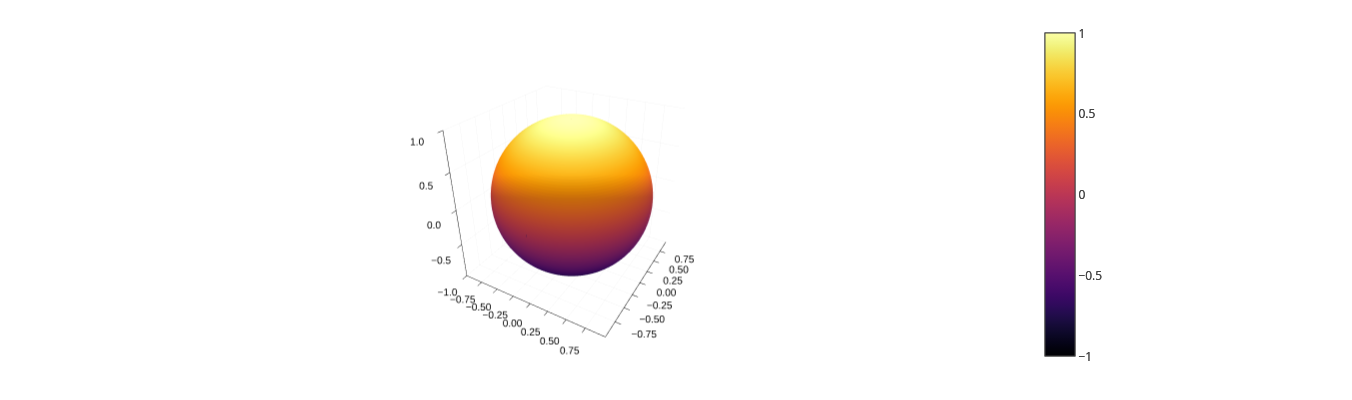

In [37]:
plotsphere(sphere(1,point(1,1,1)),c=:blue)
plotsphere!(sphere(2.5,))

plotsphere (generic function with 1 method)

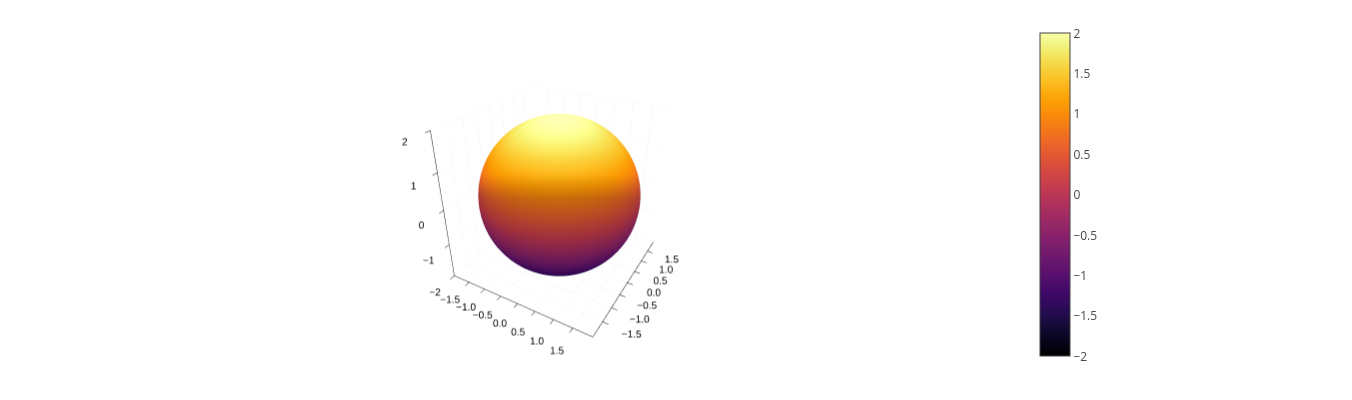

In [10]:
a = point(2,0,0)
b = point(0,2,0)
c = point(0,0,2)
d = point(-2,0,0)

Σ = a ∧ b ∧ c ∧ d

plotsphere(Σ)